## Exploration Exercises - Regression Module

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

from env import get_db_url
import os
import warnings
warnings.filterwarnings('ignore')

from wrangle import wrangle_zillow
from prepare import split_data
from prepare import min_max_scale
from explore import get_telco_data
from explore import prep_telco
from explore import plot_variable_pairs
from explore import tenure_full_years
from explore import plot_categorical_and_continuous_vars

### Explore the data for creating functions in the prepare.py file

In [ ]:
#acquire the telco data with the previous created functions
df = get_telco_data()
#view the first 5 rows of the df
df.head()

In [ ]:
#split the data with previous created function
train, validate, test = prep_telco(df)
#verify the split by looking at the shape of the three df
train.shape, validate.shape, test.shape

In [ ]:
train.head()

In [ ]:
train.columns

In [ ]:
train.dtypes

In [ ]:
#assign the continuous variable columns to plot
explore_cols = df[['tenure', 'monthly_charges', 'total_charges']]

explore_cols.head()

In [ ]:
#Plot variable pairs in notebook
sns.pairplot(explore_cols, kind='reg', plot_kws={'line_kws':{'color': 'red'}}, corner=True)
plt.show()

In [ ]:
#create a tenure years column

train['tenure_years'] = (df.tenure / 12).astype(int)
train.head()

In [ ]:
def plot_categorical_and_continuous_vars(df, cat_col, cont_col):
    fig, ax = plt.subplots(ncols=3, figsize=(14, 8))
    sns.boxplot(x=cat_col, y=cont_col, data=df, ax=ax[0])
    sns.barplot(x=cat_col, y=cont_col, data=df, ax=ax[1])
    sns.violinplot(x=cat_col, y=cont_col, data=df, ax=ax[2])
    return plt.show()

In [ ]:
plot_categorical_and_continuous_vars(train, 'gender', 'tenure' )

In [ ]:
sns.boxplot(x='gender', y='tenure', data=train)

## Test the functions from the explore.py file 
- **restart the kernel**
- run the below cells after running the import cell at the top of the notebook

In [2]:
#1
df = get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
train, validate, test = prep_telco(df)
train.shape, validate.shape, test.shape

((3943, 47), (1691, 47), (1409, 47))

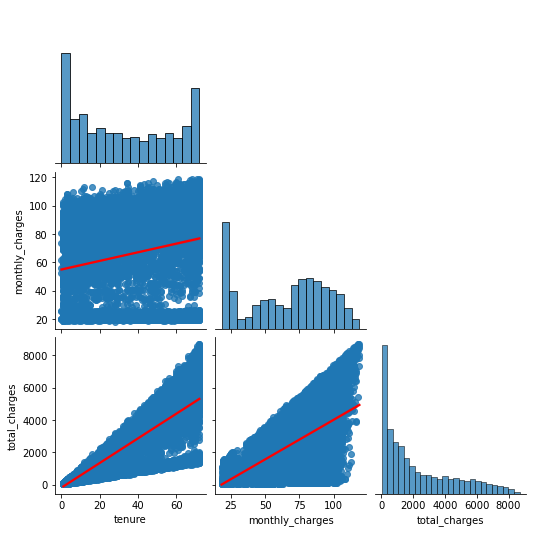

In [4]:
#2
explore_cols = df[['tenure', 'monthly_charges', 'total_charges']]
plot_variable_pairs(explore_cols)

In [5]:
#3
df = tenure_full_years(train)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_elec,pay_mail,tenure_years
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,...,1,1,0,1,0,0,0,0,0,6
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,...,0,0,0,1,0,0,1,0,0,6
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,No,No,...,1,0,1,0,1,0,0,1,0,3
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,...,1,1,0,0,0,0,0,1,0,0
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,No,Yes,...,0,1,0,0,0,0,0,0,1,0


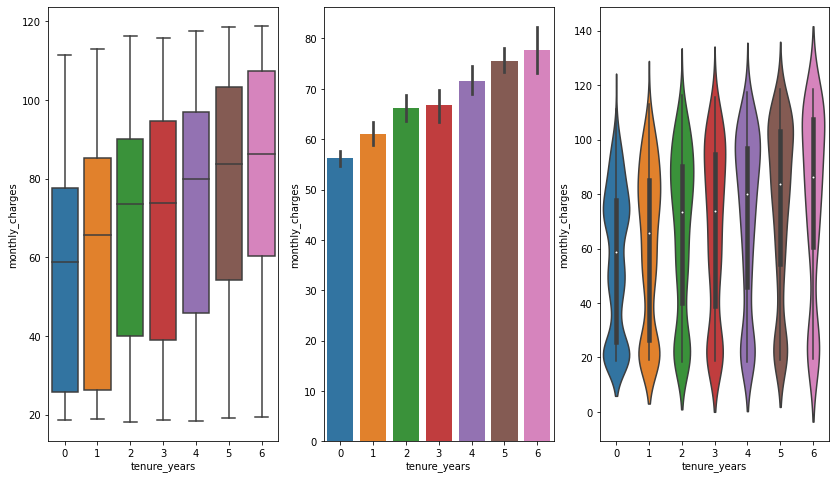

In [6]:
#4
plot_categorical_and_continuous_vars(train, 'tenure_years', 'monthly_charges' )